In [591]:
import pandas as pd
from scipy.io.arff import loadarff
# from matplot import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split


In [465]:
raw_data = loadarff('dataset.arff')
df = pd.DataFrame(raw_data[0])
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'


In [466]:
df.rename(columns={'V1': 'age', 'V2': 'job', 'V3': 'marital', 'V4': 'education', 'V5': 'default_in_credit', 'V6': 'balance', 'V7': 'housing_loan', 'V8': 'personal_loan', 'V9': 'contact', 'V10': 'last_day_contact_of_month', 'V11': 'last_month_contact_of_year', 'V12': 'contact_duration', 'V13': 'number_of_contacts_performed_during_campaign', 'V14': 'last_contact_of_previous_campaign', 'V15': 'number_of_contact_of_previous_campaign', 'V16': 'outcome_of_previous_campaign', 'Class': 'has_subscribed'}, inplace = True)
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,b'management',b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,b'management',b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,b'entrepreneur',b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,b'retired',b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,b'technician',b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [467]:
df_job = pd.get_dummies(df['job'])
df_job.head(5)

,b'admin.',b'blue-collar',b'entrepreneur',b'housemaid',b'management',b'retired',b'self-employed',b'services',b'student',b'technician',b'unemployed',b'unknown'
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [468]:
dict_job = {}
i=0
for job in df_job.columns.values:
    dict_job[job] = i
    i+=1
print(dict_job)

{b'admin.': 0, b'blue-collar': 1, b'entrepreneur': 2, b'housemaid': 3, b'management': 4, b'retired': 5, b'self-employed': 6, b'services': 7, b'student': 8, b'technician': 9, b'unemployed': 10, b'unknown': 11}


In [469]:
for job in dict_job.keys():
    df['job'].loc[(df['job'] == job)] = dict_job[job]
    warnings.filterwarnings('ignore')

In [470]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,9,b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,2,b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,1,b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,11,b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,4,b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,4,b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,2,b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,5,b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,9,b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [471]:
df_marital = pd.get_dummies(df['marital'])

In [472]:
df_marital.head(10)

,b'divorced',b'married',b'single'
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,0,1
7,1,0,0
8,0,1,0
9,0,0,1


In [473]:
dict_marital = {b'single': 0, b'married': 1, b'divorced': 2}
print(dict_marital)

{b'single': 0, b'married': 1, b'divorced': 2}


In [474]:
for marital in dict_marital.keys():
    df['marital'].loc[(df['marital'] == marital)] = dict_marital[marital]
    warnings.filterwarnings('ignore')

In [475]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,9,0,b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,2,1,b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,1,1,b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,11,0,b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,4,1,b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,4,0,b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,2,2,b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,5,1,b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,9,0,b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [476]:
df['default_in_credit'].loc[(df['default_in_credit'] == b'no')] = 0
df['default_in_credit'].loc[(df['default_in_credit'] == b'yes')] = 1
df['housing_loan'].loc[(df['housing_loan'] == b'no')] = 0
df['housing_loan'].loc[(df['housing_loan'] == b'yes')] = 1
df['personal_loan'].loc[(df['personal_loan'] == b'no')] = 0
df['personal_loan'].loc[(df['personal_loan'] == b'yes')] = 1
df['last_contact_of_previous_campaign'].loc[(df['last_contact_of_previous_campaign'] == -1.0)] = 0

In [477]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,b'tertiary',0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,b'unknown',b'1'
1,44.0,9,0,b'secondary',0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,b'unknown',b'1'
2,33.0,2,1,b'secondary',0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,b'unknown',b'1'
3,47.0,1,1,b'unknown',0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,b'unknown',b'1'
4,33.0,11,0,b'unknown',0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,b'unknown',b'1'
5,35.0,4,1,b'tertiary',0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,b'unknown',b'1'
6,28.0,4,0,b'tertiary',0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,b'unknown',b'1'
7,42.0,2,2,b'tertiary',1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,b'unknown',b'1'
8,58.0,5,1,b'primary',0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,b'unknown',b'1'
9,43.0,9,0,b'secondary',0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,b'unknown',b'1'


In [478]:
df_education = pd.get_dummies(df['education'])
df_education.head(10)

,b'primary',b'secondary',b'tertiary',b'unknown'
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,1,0,0


In [479]:
dict_education = {b'unknown': 0, b'primary': 1, b'secondary': 2, b'tertiary': 3}
print(dict_education)

{b'unknown': 0, b'primary': 1, b'secondary': 2, b'tertiary': 3}


In [480]:
for education in dict_education.keys():
    df['education'].loc[(df['education'] == education)] = dict_education[education]
    warnings.filterwarnings('ignore')

In [481]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,b'unknown',b'1'
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,b'unknown',b'1'
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,b'unknown',b'1'
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,b'unknown',b'1'
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,b'unknown',b'1'
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,b'unknown',b'1'
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,b'unknown',b'1'
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,b'unknown',b'1'
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,b'unknown',b'1'
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,b'unknown',b'1'


In [482]:
df_outcome_previous = pd.get_dummies(df['outcome_of_previous_campaign'])
df_outcome_previous.head(10)

,b'failure',b'other',b'success',b'unknown'
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [483]:
previous_outcome_campaign_dict = {b'failure': 0, b'success': 1, b'other': 2, b'unknown': 3}
print(previous_outcome_campaign_dict)

{b'failure': 0, b'success': 1, b'other': 2, b'unknown': 3}


In [484]:
for previous_outcome in previous_outcome_campaign_dict.keys():
    df['outcome_of_previous_campaign'].loc[(df['outcome_of_previous_campaign'] == previous_outcome)] = previous_outcome_campaign_dict[previous_outcome]
    warnings.filterwarnings('ignore')

In [485]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,3,b'1'
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,3,b'1'
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,3,b'1'
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,3,b'1'
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,3,b'1'
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,3,b'1'
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,3,b'1'
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,3,b'1'
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,3,b'1'
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,3,b'1'


In [486]:
df_last_month_contact = pd.get_dummies(df['last_month_contact_of_year'])
df_last_month_contact.head(10)

,b'apr',b'aug',b'dec',b'feb',b'jan',b'jul',b'jun',b'mar',b'may',b'nov',b'oct',b'sep'
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0


In [487]:
month_dict = {b'jan': 1, b'feb': 2, b'mar': 3, b'apr': 4, b'may': 5, b'jun': 6, b'jul': 7, b'aug': 8, b'sep': 9, b'oct': 10, b'nov': 11, b'dec': 12}
print(month_dict)

{b'jan': 1, b'feb': 2, b'mar': 3, b'apr': 4, b'may': 5, b'jun': 6, b'jul': 7, b'aug': 8, b'sep': 9, b'oct': 10, b'nov': 11, b'dec': 12}


In [488]:
for month in month_dict.keys():
    df['last_month_contact_of_year'].loc[(df['last_month_contact_of_year'] == month)] = month_dict[month]
    warnings.filterwarnings('ignore')

In [489]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,5,261.0,1.0,0.0,0.0,3,b'1'
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,5,151.0,1.0,0.0,0.0,3,b'1'
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,5,76.0,1.0,0.0,0.0,3,b'1'
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,5,92.0,1.0,0.0,0.0,3,b'1'
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,5,198.0,1.0,0.0,0.0,3,b'1'
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,5,139.0,1.0,0.0,0.0,3,b'1'
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,5,217.0,1.0,0.0,0.0,3,b'1'
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,5,380.0,1.0,0.0,0.0,3,b'1'
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,5,50.0,1.0,0.0,0.0,3,b'1'
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,5,55.0,1.0,0.0,0.0,3,b'1'


In [490]:
dict_subscribed = {b'1': 0, b'2': 1}
print(dict_subscribed)

{b'1': 0, b'2': 1}


In [491]:
for subs in dict_subscribed.keys():
    df['has_subscribed'].loc[(df['has_subscribed'] == subs)] = dict_subscribed[subs]
    warnings.filterwarnings('ignore')

In [492]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,5,261.0,1.0,0.0,0.0,3,0
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,5,151.0,1.0,0.0,0.0,3,0
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,5,76.0,1.0,0.0,0.0,3,0
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,5,92.0,1.0,0.0,0.0,3,0
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,5,198.0,1.0,0.0,0.0,3,0
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,5,139.0,1.0,0.0,0.0,3,0
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,5,217.0,1.0,0.0,0.0,3,0
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,5,380.0,1.0,0.0,0.0,3,0
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,5,50.0,1.0,0.0,0.0,3,0
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,5,55.0,1.0,0.0,0.0,3,0


In [493]:
df.dropna(inplace=True)

In [494]:
df.drop(['contact', 'age', 'marital', 'education', 'default_in_credit', 'housing_loan', 'personal_loan', 'last_day_contact_of_month', 'last_month_contact_of_year', 'number_of_contact_of_previous_campaign'], axis=1, inplace=True)

In [496]:
df.drop(['job'], axis=1, inplace=True)

In [501]:
df.drop(['number_of_contacts_performed_during_campaign'], axis=1, inplace=True)

In [596]:
df= df[df['balance'] > 1000]
df

,balance,contact_duration,last_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,2143.0,261.0,0.0,3,0
3,1506.0,92.0,0.0,3,0
34,10635.0,336.0,0.0,3,0
40,2586.0,160.0,0.0,3,0
50,1291.0,266.0,0.0,3,0
...,...,...,...,...,...
45199,1475.0,1166.0,530.0,2,0
45204,2850.0,300.0,40.0,0,1
45207,1729.0,456.0,0.0,3,1
45208,5715.0,1127.0,184.0,1,1


Analisando os dados podemos ver que a classe está desbalanceada, aplicaremos o KNN nos dados sem realizar um balanceamento, para visualizar sua precisão e a quantidade de FP e FN

<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

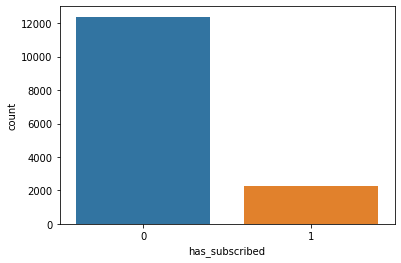

In [597]:
sns.countplot(x= 'has_subscribed', data=df)

Coletando os dados de treino e teste

In [598]:
x = df.drop('has_subscribed', axis= 1)
y = df['has_subscribed']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, shuffle=True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


Declarando a variável para KNN

In [599]:
knn = KNeighborsClassifier(n_neighbors=3)

Aplicando KNN nos dados

In [600]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_proba = knn.predict_proba(x_test)

Resultados do modelo

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.8846    0.9286    0.9061      3096
           1     0.4583    0.3327    0.3856       562

    accuracy                         0.8371      3658
   macro avg     0.6715    0.6307    0.6458      3658
weighted avg     0.8191    0.8371    0.8261      3658

Acurácia: 0.8371

AUC: 0.6307



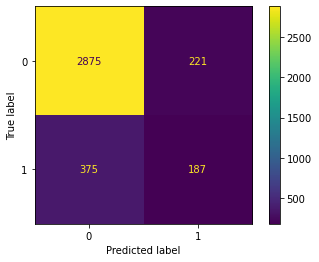

In [601]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_test, y_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))


Podemos visualizar uma alta taxa de FP, além de uma acurácia não tão desejada, faremos o balanceamento dos dados, tanto utilizando undersampling quanto utilizando oversampling para visualizar qual obtém resultados mais desejáveis

Declarando as variáveis para undersampling e oversampling

In [602]:
under_sampler = RandomUnderSampler()
over_sampler = RandomOverSampler()
near_miss = NearMiss()
one_sided_selection = OneSidedSelection()

Aplicando undersampling nos dados de treino

0    1686
1    1686
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

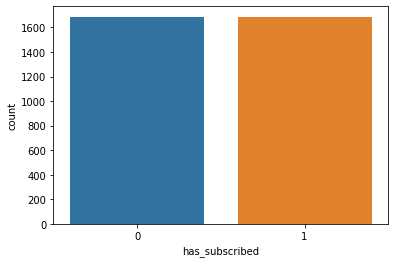

In [603]:
x_rus_train, y_rus_train = under_sampler.fit_resample(x_train, y_train)
# x_rus_train, y_rus_train = near_miss.fit_resample(x_rus_train, y_rus_train)
# x_rus_train, y_rus_train = one_sided_selection.fit_resample(x_rus_train, y_rus_train)
print(pd.Series(y_rus_train).value_counts())
sns.countplot(x=y_rus_train)

Aplicando KNN nos dados de treino com undersampling

In [604]:
knn.fit(x_rus_train, y_rus_train)
y_rus_pred = knn.predict(x_test)
y_rus_proba = knn.predict_proba(x_test)

Matriz de confusão do algoritmo KNN nos dados de treino

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9259    0.6744    0.7804      3096
           1     0.2815    0.7028    0.4020       562

    accuracy                         0.6788      3658
   macro avg     0.6037    0.6886    0.5912      3658
weighted avg     0.8269    0.6788    0.7223      3658

Acurácia: 0.6788

AUC: 0.6886



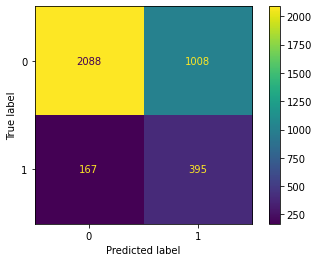

In [605]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_rus_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_test, y_rus_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_rus_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_rus_pred)))


Podemos visualizar uma diminuição na taxa de FP porém um aumento na taxa de FN, além da diminuição da acurácia do modelo

Agora utilizaremos o modelo com Oversampling

0    24858
1    24858
Name: has_subscribed, dtype: int64


<AxesSubplot:xlabel='has_subscribed', ylabel='count'>

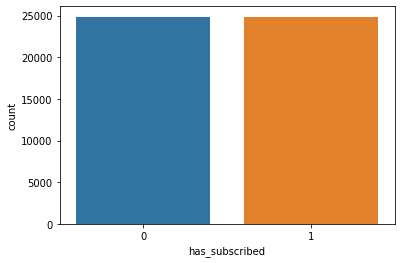

In [582]:
x_ros_train, y_ros_train = over_sampler.fit_resample(x_train, y_train)
x_ros_train, y_ros_train = smote.fit_resample(x_ros_train, y_ros_train)
print(pd.Series(y_ros_train).value_counts())
sns.countplot(x=y_ros_train)

In [583]:
knn.fit(x_ros_train, y_ros_train)
y_ros_pred = knn.predict(x_test)
y_ros_proba = knn.predict_proba(x_test)

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9237    0.8412    0.8805      8286
           1     0.3206    0.5188    0.3963      1197

    accuracy                         0.8005      9483
   macro avg     0.6221    0.6800    0.6384      9483
weighted avg     0.8475    0.8005    0.8194      9483

Acurácia: 0.8005

AUC: 0.6800



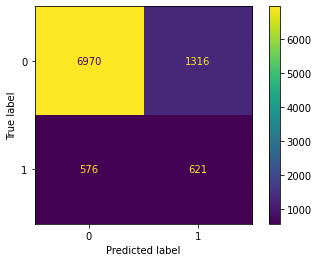

In [584]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_ros_pred)).plot()
print('Relatório de classificação: \n', classification_report(y_test, y_ros_pred, digits=4))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_ros_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_ros_pred)))


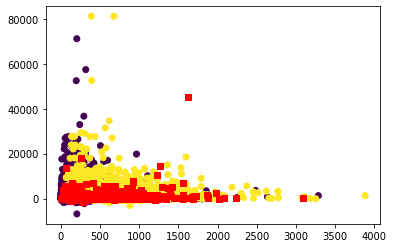

In [430]:
fig, ax = plt.subplots()

ax.scatter(x=x.contact_duration, y=x.balance, c=y, cmap='viridis')
ax.scatter(x=x_test.contact_duration, y=x_test.balance, c='r', marker='s')
plt.show()

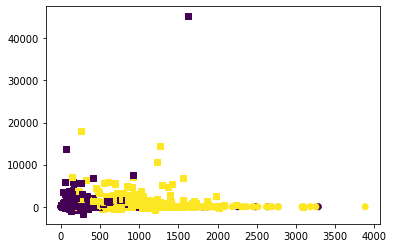

In [431]:
fig, ax = plt.subplots()

ax.scatter(x=x.contact_duration, y=x.outcome_of_previous_campaign, c=y, cmap='viridis')
ax.scatter(x=x_test.contact_duration, y=x_test.balance, c=y_pred, marker='s')
plt.show()

In [432]:
accuracy = str(round(knn.score(x,y) * 100, 2))+"%"
print("A acurácia do modelo k-NN undersampled foi",accuracy)

A acurácia do modelo k-NN undersampled foi 88.2%


In [433]:
ros = RandomOverSampler(random_state=32)
smote = SMOTE(random_state=32)
x = df_train[['contact_duration', 'outcome_of_previous_campaign', 'last_contact_of_previous_campaign', 'balance']]
y = df_train.has_subscribed
y=y.astype('int')
knn = KNeighborsClassifier(n_neighbors=3)
x, y = ros.fit_resample(x, y)
x, y = smote.fit_resample(x,y)
knn.fit(x, y)
# print(knn.predict_proba([[1, 5000, 29]]))

x_test = df_test[['contact_duration', 'outcome_of_previous_campaign', 'last_contact_of_previous_campaign', 'balance']]
y_test = df_test.has_subscribed
y_test = y_test.astype(int)
x_test, y_test = ros.fit_resample(x_test, y_test)
x_test, y_test = smote.fit_resample(x_test, y_test)
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [434]:
y_test = pd.array(y_test, dtype='float64')

In [570]:
df

,balance,contact_duration,last_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,2143.0,261.0,0.0,3,0
1,29.0,151.0,0.0,3,0
2,2.0,76.0,0.0,3,0
3,1506.0,92.0,0.0,3,0
4,1.0,198.0,0.0,3,0
...,...,...,...,...,...
45206,825.0,977.0,0.0,3,1
45207,1729.0,456.0,0.0,3,1
45208,5715.0,1127.0,184.0,1,1
45209,668.0,508.0,0.0,3,0


In [571]:
x_train

,balance,contact_duration,last_contact_of_previous_campaign,outcome_of_previous_campaign
4726,1831.0,203.0,0.0,3
17422,2683.0,73.0,0.0,3
36779,-118.0,230.0,0.0,3
2810,1130.0,138.0,0.0,3
32648,3975.0,515.0,150.0,2
...,...,...,...,...
36902,947.0,361.0,0.0,3
14403,0.0,111.0,0.0,3
29870,739.0,605.0,0.0,3
28058,358.0,156.0,0.0,3


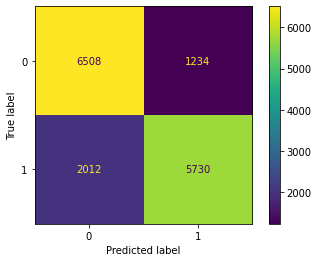

In [436]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

In [437]:
accuracy = str(round(knn.score(x,y) * 100, 2))+"%"
print("A acurácia do modelo k-NN oversampled foi",accuracy)

A acurácia do modelo k-NN oversampled foi 94.36%


In [451]:
ros = RandomOverSampler(random_state=32)
smote = SMOTE(random_state=32)
x = df[['contact_duration', 'outcome_of_previous_campaign', 'last_contact_of_previous_campaign', 'balance']]
y = df.has_subscribed
y=y.astype('int')

x, y = ros.fit_resample(x, y)
x, y = smote.fit_resample(x, y)


In [454]:
x_train = x[23953:]
y_train = y[23953:]

x_test = x[:23953]
y_test = y[:23953]
y_test = pd.array(y_test, dtype='float64')

In [455]:
x_test

,contact_duration,outcome_of_previous_campaign,last_contact_of_previous_campaign,balance
0,261.0,3.0,0.0,2143.0
1,151.0,3.0,0.0,29.0
2,76.0,3.0,0.0,2.0
3,92.0,3.0,0.0,1506.0
4,198.0,3.0,0.0,1.0
...,...,...,...,...
23948,64.0,3.0,0.0,370.0
23949,131.0,3.0,0.0,258.0
23950,511.0,3.0,0.0,1255.0
23951,82.0,3.0,0.0,148.0


In [456]:
y_test

<PandasArray>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 ...
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Length: 23953, dtype: float64

In [457]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

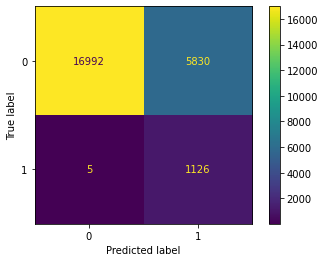

In [458]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

In [459]:
accuracy = str(round(knn.score(x,y) * 100, 2))+"%"
print("A acurácia do modelo k-NN foi",accuracy)

A acurácia do modelo k-NN foi 88.75%
